In [58]:
#Import modules
import pyodbc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

#1 = Sliding
#0 = Rotating

# Engels Questions

## What is error
## How do we show the event prior to the event
## Quantative measurement based on time and depth
## Time series

## start model on just time then distance or vice versus then maybe both if needed

## want to be early on prediction and never late
## use absolute time differential before concentrating 
#


In [2]:
#Connect to DB
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=jvsql02;'
                      'Database=ML;'
                      'Trusted_Connection=yes;')

#Select the data from the table
SQL_Query = pd.read_sql_query(
'''select * from ML.dbo.TCR_ML_WELLS_Time_Analysis_Full''', conn)

In [64]:
#Convert the query to a data frame
df_raw = pd.DataFrame(SQL_Query, columns=              
    [
        'WellName','ReportDateTime','AccumulatedConnectionTime','AccumulatedFillupStrokes','AccumulatedFillupVolume'
,'ADAutoDrillerRunning','ADAuxiliary1','ADAuxiliary2','ADAuxiliary3','ADAuxiliary4','ADAuxiliary5'
,'ADDifferentialPressureActualValue','ADDifferentialPressureLimitValue','ADDifferentialPressureSetpointValue','ADDPEnabled'
,'ADHookloadSlider','ADROPActualValue','ADROPCruiseControlEnabled','ADROPSetpointValue','ADSPPSlider','ADSystemEnabled'
,'ADWOBActualValue','ADWOBEnabled','ADWOBLimitValue','ADWOBSetpointValue','BitArea','BitNozzleTotalFlowArea','BitRPM'
,'BitTime_OffBottom','BitTime_OnBottom','BlockPosition','CasingPressure','CoilEngaged','ConnectionCounter'
,'CurrentConnectionTime','Date','DateDateOnly','DateTimeOnly','Depth_Bit','DepthHoleTVD','DifferentialPressure'
,'DrillCabTDSUTemp','DrillMode','DynamicVariable06','DynamicVariable09','DynamicVariable10','EC1Active','EC1ActivityCode1'
,'EC1ActivityCode2','EC1ActivityCode3','EC1ActivityCode4','EC1ActivityCode5','EC1Authorized','EC1DPModeOn','EC1DPModeOnReq'
,'EC1DPSPActual','EC1DPSPRecommended','EC1Ready','EC1ROPSPActual','EC1ROPSPRecommended','EC1WOBModeOn','EC1WOBModeOnReq'
,'EC1WOBSPActual','EC1WOBSPRecommended','FlowIn','GasTotal_units','H2S04','H2S08','H2S09','H2S11','Hookload'
,'HookloadInline','HookloadString','JobPumpVolumeTotal','JobStrokesTotal','LagDepthGas','LEL01','LEL02','LEL03','LEL04'
,'LEL05','LEL06','LEL07','LEL08','LEL09','LEL10','LEL11','LEL12','MudMotorRPM','MWDAzimuth'
,'MWDContinuousInclination','MWDGammaAPI','MWDInclination','MWDSrvToolfaceAdvisory','MWDSrvToolfaceLimits'
,'OnBottom','OverPull','Pit01Volume','Pit02Volume','Pit03Volume','Pit04Volume','Pit05GL','Pit06Volume','Pit07Volume'
,'PitGLActive','PitGLCompanyMan','PitGLMudLogger','PitGLMWD','PitGLSignature','PitVolumeActive','PitVolumeTotal'
,'PLCStatus','PreviousConnectionTime','PumpOffTime','PumpOnTime','PumpPressure','PumpsOn','PumpVolumeTotal','ReturnFlow'
,'ReturnFlowDetected','REVitEnabled','REVitUsageAlert','ROCKIT_BearingActualRW','ROCKIT_HITRQLeft','ROCKIT_HITRQLeftPercent'
,'ROCKIT_HITRQRight','ROCKIT_HITRQRightPercent','ROCKIT_OnOff','ROCKIT_OscillationLeftRW','ROCKIT_OscillationRightRW'
,'ROCKIT_PILOTOnOff','ROCKIT_ResultantToolface','ROCKIT_RPMRW','ROCKIT_ScoreCardRW','ROCKIT_SlidetoMDRW','ROCKIT_TFtoRW'
,'ROP5xDepthhour','ROPDepth_StepDepthHour','ROPDepthHour','ROPMax','ROPMinuteDepth','ROPTimeDepthHour','RotaryRPM'
,'RunningSpeedDown','RunningSpeedUp','SeperatorFlow','SlipsSet','SPM1','SPM2','SPMTotal','StaticInjectorForce'
,'STCfActualNm_Sec','STKfActualNm','Strokes1','Strokes1CompanyMan','Strokes2','Strokes2CompanyMan','StrokesTotal'
,'StrokesTotalCompanyMan','StrokesTotalMudLogger','TDOilSensorBypassAlarm','TDOilType','TDPLCAlarm1','TDPLCAlarm4'
,'TDQuillPosition','TDS_AmbientTemperature','TDS_BrakeTemperature','TDS_HPUOilTankTemperature','TDS_HydraulicTemperature'
,'TDS_LowerBearingTemp','TDS_LubeOilAfterFilterPres','TDS_LubeOilPressure','TDS_LubeOilTemperature'
,'TDS_MotorWindingTemperature1','TDS_MotorWindingTemperature2','TDS_MotorWindingTemperature3ACOnly'
,'TDS_OilPressureAcrosstheFilter','TDS_UpperBearingTemp','TDSRotaryTorqueLimit','TDTorqueInline','TongMakeupStartPressure'
,'TonMilesEventCumulative','TonMilesMegajoules','TopDriveRPM','TopDriveRPMCommand','TopDriveTorqueCommand'
,'TopDriveTorqueft_lbs','TorqueDelta','TorqueTare','TripGL','TripGLCompanyMan','TripGLSignature','TripModeAccumulation'
,'TripModeFillupStrokes','TripVolumeActive','UnderPull','VFDVariable10','VFDVariable9','WeightonBit'
            ])



In [65]:
df_raw.head(2)

,WellName,ReportDateTime,AccumulatedConnectionTime,AccumulatedFillupStrokes,AccumulatedFillupVolume,ADAutoDrillerRunning,ADAuxiliary1,ADAuxiliary2,ADAuxiliary3,ADAuxiliary4,...,TripGL,TripGLCompanyMan,TripGLSignature,TripModeAccumulation,TripModeFillupStrokes,TripVolumeActive,UnderPull,VFDVariable10,VFDVariable9,WeightonBit
0,LANGE_A_N048HM_TIME.csv,2018-07-19 19:27:20,3.613368e+09,0.0,0.0,-1.0,65.026100,60.0,0.0,256.0,...,2.75318,-36.650749,3.614740e+09,0.0,0.0,3.62847,0.0,0.0,0.0,22.928080
1,LANGE_A_N048HM_TIME.csv,2018-07-19 19:27:30,3.613368e+09,0.0,0.0,-1.0,64.834343,60.0,0.0,256.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,22.223921


In [66]:
#Convert the query to a data frame
df_time_indexed = df.set_index('ReportDateTime')
df_time_indexed.head(2)

,WellName,AccumulatedConnectionTime,AccumulatedFillupStrokes,AccumulatedFillupVolume,ADAutoDrillerRunning,ADAuxiliary1,ADAuxiliary2,ADAuxiliary3,ADAuxiliary4,ADAuxiliary5,...,TripGL,TripGLCompanyMan,TripGLSignature,TripModeAccumulation,TripModeFillupStrokes,TripVolumeActive,UnderPull,VFDVariable10,VFDVariable9,WeightonBit
ReportDateTime,,,,,,,,,,,,,,,,,,,,,
2018-07-19 19:27:20,LANGE_A_N048HM_TIME.csv,3.613368e+09,0.0,0.0,-1.0,65.026100,60.0,0.0,256.0,42.0,...,2.75318,-36.650749,3.614740e+09,0.0,0.0,3.62847,0.0,0.0,0.0,22.928080
2018-07-19 19:27:30,LANGE_A_N048HM_TIME.csv,3.613368e+09,0.0,0.0,-1.0,64.834343,60.0,0.0,256.0,42.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,22.223921


In [67]:
df_time_indexed.drop([ 'AccumulatedFillupStrokes', 'AccumulatedFillupVolume', 'ADAuxiliary2', 'ADAuxiliary3', 'ADAuxiliary4', 'ADAuxiliary5', 'BitArea', 'BitNozzleTotalFlowArea', 'CoilEngaged', 'CurrentConnectionTime'
, 'DrillMode', 'DynamicVariable09', 'EC1Active', 'EC1ActivityCode1', 'EC1ActivityCode2', 'EC1ActivityCode3', 'EC1ActivityCode4', 'EC1ActivityCode5', 'EC1Authorized', 'EC1DPModeOn', 'EC1DPModeOnReq'
, 'EC1DPSPActual', 'EC1DPSPRecommended', 'EC1Ready', 'EC1ROPSPActual', 'EC1ROPSPRecommended', 'EC1WOBModeOn', 'EC1WOBModeOnReq', 'EC1WOBSPActual', 'EC1WOBSPRecommended', 'H2S08', 'H2S09'
, 'HookloadInline', 'LEL01', 'LEL03', 'LEL05', 'LEL06', 'LEL08', 'LEL09', 'LEL10', 'LEL12', 'MudMotorRPM', 'OnBottom', 'PLCStatus', 'REVitEnabled', 'REVitUsageAlert', 'ROCKIT_PILOTOnOff', 'SlipsSet'
, 'StaticInjectorForce', 'STCfActualNm_Sec', 'STKfActualNm', 'TDOilSensorBypassAlarm', 'TDOilType', 'TDTorqueInline', 'TongMakeupStartPressure', 'TorqueTare', 'UnderPull', 'VFDVariable10', 'VFDVariable9'
, 'H2S04', 'LEL02', 'LEL11', 'SeperatorFlow', 'H2S11', 'Date', 'DateDateOnly', 'DateTimeOnly', 'AccumulatedConnectionTime', 'ADAutoDrillerRunning', 'ADDPEnabled', 'ADROPCruiseControlEnabled', 'ADSystemEnabled', 'ADWOBEnabled'
, 'TripModeAccumulation', 'TripModeFillupStrokes', 'ADAuxiliary1'
        ], axis=1, inplace=True)
#, 'ReportDateTime'
#, 'WellName'
#ADAuxiliary1 - removed as per vendor (user defined)

In [68]:
df_time_indexed.drop(['WellName'], axis=1, inplace=True)

In [69]:
#see the dimensions of the data
df_time_indexed.shape

(725789, 121)

In [70]:
#Show first 5 rows of data
df_time_indexed.head(2)

,ADDifferentialPressureActualValue,ADDifferentialPressureLimitValue,ADDifferentialPressureSetpointValue,ADHookloadSlider,ADROPActualValue,ADROPSetpointValue,ADSPPSlider,ADWOBActualValue,ADWOBLimitValue,ADWOBSetpointValue,...,TopDriveRPM,TopDriveRPMCommand,TopDriveTorqueCommand,TopDriveTorqueft_lbs,TorqueDelta,TripGL,TripGLCompanyMan,TripGLSignature,TripVolumeActive,WeightonBit
ReportDateTime,,,,,,,,,,,,,,,,,,,,,
2018-07-19 19:27:20,260.875885,850.0,420.0,1.0,13.85443,90.0,1.0,21.675610,32.0,22.0,...,65.068710,65.068710,7801.826660,7801.826660,8106.402832,2.75318,-36.650749,3.614740e+09,3.62847,22.928080
2018-07-19 19:27:30,238.689758,850.0,420.0,1.0,67.49762,90.0,1.0,22.071711,32.0,22.0,...,64.994141,64.994141,8277.098633,8277.098633,10024.226562,2.73727,-36.666672,3.614740e+09,3.61256,22.223921


## Create Features and Labels

In [140]:
label_column =  'ROCKIT_OnOff'

features = df_time_indexed.dropna().drop([label_column], axis=1)
#features = df.dropna().drop([label_column, 'ROCKIT_RPMRW'], axis=1)
labels = df_time_indexed.dropna()[label_column]

X = features.values
y = labels.values

# Grid Search -- Do not have to run again

In [72]:
params = {'max_depth':[5, 10, 15], 'min_samples_split':[2, 4, 8]}

clf = DecisionTreeClassifier()

grid = GridSearchCV(clf, params, cv=10)

In [73]:
#To run on small sample set
#grid.fit(X[:500], y[:500])

#to run on full data set
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15], 'min_samples_split': [2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
best_dt = grid.best_estimator_
best_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
grid.best_params_

{'max_depth': 5, 'min_samples_split': 8}

## Grid Search Results: 
### best paramaters are{'max_depth': 5, 'min_samples_split': 8}

# Apply best param to feature selection
## Create Labels

In [76]:
label_column =  'ROCKIT_OnOff'

#fill in max depth and min samples with above numbers
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=8)

#After grid search is done you can use the object for descion tree fits
#dt = grid.best_estimator_

In [77]:
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Create indices
### Non zero importances

In [78]:
#index feature importance
feature_importances = dt.feature_importances_

#Get non zero indicies to filter with
nz_indices = np.argwhere(feature_importances > 0)
nz_features = features.columns[nz_indices].values.flatten()
nz_importances = feature_importances[nz_indices].flatten()

In [79]:
#Find the most importance features number
#nz_features[ np.argmax(nz_importances) ]
#nz_importances.max()

print("Max non-zero feature name = "+ nz_features[ np.argmax(nz_importances) ])
print("Max non-zero feature value = %s" % nz_importances.max())

Max non-zero feature name = ROCKIT_RPMRW
Max non-zero feature value = 0.8541623398246567


### Top quartiles analysis

In [80]:
imp = pd.Series(nz_importances)
desc = imp.describe()
desc

count    19.000000
mean      0.052632
std       0.194556
min       0.000007
25%       0.000448
50%       0.002963
75%       0.010801
max       0.854162
dtype: float64

In [81]:
#Function to run percent analysis
def rank(imp, perc, remove_outlier=True):
    if remove_outlier:
        imp = imp[imp < imp.max()]
   
    desc = imp.describe()
    if type(perc) == str:
        top = imp[ imp >=  desc[perc]]
    else:
        top = imp[ imp >= perc]
    
    # N top features
    n_top = top.shape[0]
    
    # Total variation explanation
    var_expl = top.sum() / imp.sum()
    
    return n_top, var_expl

### Save the features and variance to object

In [82]:
#Create variables that shows features and variances
#Number of features, fractioned explained by variance

# True (default) = removes outlier
# False = Keeps outlier

Perc25_NoOutlier = rank(imp, '25%')
Perc50_NoOutlier = rank(imp, '50%')
Perc75_NoOutlier = rank(imp, '75%')


Perc25_WithOutlier = rank(imp, '25%', False)
Perc50_WithOutlier = rank(imp, '50%', False)
Perc75_WithOutlier = rank(imp, '75%', False)

### Features & Variance with no Outliers

In [83]:
print(f'25% Quartile with no outlier include {Perc25_NoOutlier[0]} features and explains {round(Perc25_NoOutlier[1]*100, 3)}% of the variance')
print(f'50% Quartile with no outlier include {Perc50_NoOutlier[0]} features and explains {round(Perc50_NoOutlier[1]*100, 3)}% of the variance')
print(f'75% Quartile with no outlier include {Perc75_NoOutlier[0]} features and explains {round(Perc75_NoOutlier[1]*100, 3)}% of the variance')

25% Quartile with no outlier include 13 features and explains 99.354% of the variance
50% Quartile with no outlier include 9 features and explains 95.957% of the variance
75% Quartile with no outlier include 5 features and explains 86.233% of the variance


### Features & Variance with Outliers

In [84]:
print(f'25% Quartile with outlier include {Perc25_WithOutlier[0]} features and explains {round(Perc25_WithOutlier[1]*100, 3)}% of the variance')
print(f'50% Quartile with outlier include {Perc50_WithOutlier[0]} features and explains {round(Perc50_WithOutlier[1]*100, 3)}% of the variance')
print(f'75% Quartile with outlier include {Perc75_WithOutlier[0]} features and explains {round(Perc75_WithOutlier[1]*100, 3)}% of the variance')

25% Quartile with outlier include 14 features and explains 99.906% of the variance
50% Quartile with outlier include 10 features and explains 99.41% of the variance
75% Quartile with outlier include 5 features and explains 97.506% of the variance


# Top 25% Features

<BarContainer object of 9 artists>

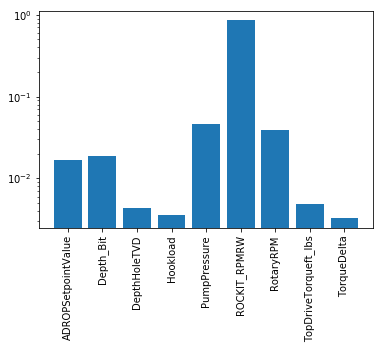

In [85]:
#Apply threshold to only use top 25% of features
#threshold = desc['75%'] #Top 25% quartile
threshold = desc['50%'] #Top 50% quartile
#threshold = desc['25%'] #Top 75% quartile

top_indices = np.argwhere(nz_importances > threshold)
top_features = nz_features[top_indices].flatten()
top_importances = nz_importances[top_indices].flatten()

#Plot the data
plt.xticks(rotation=90)
plt.bar(top_features, top_importances, log=True)

## Sort the data by size

<BarContainer object of 9 artists>

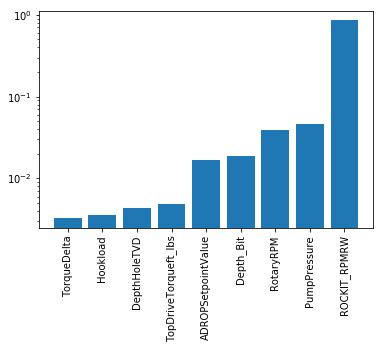

In [86]:
sorted_indices = np.argsort(top_importances)
sorted_features = top_features[sorted_indices]
sorted_importances = top_importances[sorted_indices]

#Plot the sorted values
plt.xticks(rotation=90)
plt.bar(sorted_features, sorted_importances, log=True)

In [87]:
sorted_features

array(['TorqueDelta', 'Hookload', 'DepthHoleTVD', 'TopDriveTorqueft_lbs',
       'ADROPSetpointValue', 'Depth_Bit', 'RotaryRPM', 'PumpPressure',
       'ROCKIT_RPMRW'], dtype=object)

## Data Frame of Top Features

In [88]:
reduced_features = features[sorted_features]

In [89]:
reduced_features.head(2)

,TorqueDelta,Hookload,DepthHoleTVD,TopDriveTorqueft_lbs,ADROPSetpointValue,Depth_Bit,RotaryRPM,PumpPressure,ROCKIT_RPMRW
ReportDateTime,,,,,,,,,
2018-07-19 19:27:20,8106.402832,126.568260,7699.095215,7801.826660,90.0,7699.096680,65.026100,2158.405273,65.0
2018-07-19 19:27:30,10024.226562,127.336578,7699.225098,8277.098633,90.0,7699.225098,64.834343,2163.194824,65.0


In [90]:
#Put values in array for models
X_reduced = reduced_features.values

In [91]:
#dt_reduced = DecisionTreeClassifier(max_depth=5, min_samples_split=2)

In [92]:
#dt_reduced.fit(X_reduced, y)

In [99]:
#Row count of lables
labels.shape

(690102,)

In [100]:
#row count and column count of features
reduced_features.shape

(690102, 9)

In [97]:
reduced_features.head(2)

,TorqueDelta,Hookload,DepthHoleTVD,TopDriveTorqueft_lbs,ADROPSetpointValue,Depth_Bit,RotaryRPM,PumpPressure,ROCKIT_RPMRW
ReportDateTime,,,,,,,,,
2018-07-19 19:27:20,8106.402832,126.568260,7699.095215,7801.826660,90.0,7699.096680,65.026100,2158.405273,65.0
2018-07-19 19:27:30,10024.226562,127.336578,7699.225098,8277.098633,90.0,7699.225098,64.834343,2163.194824,65.0
2018-07-19 19:27:40,8812.617188,125.664368,7699.344727,9625.935547,90.0,7699.344727,64.834343,2161.829102,65.0
2018-07-19 19:27:50,7748.275391,125.867737,7699.515625,8477.918945,90.0,7699.522461,64.983490,2163.212402,65.0
2018-07-19 19:28:00,8467.876953,125.144623,7699.599121,6720.750000,90.0,7699.608398,65.079369,2173.481201,65.0


### Function to set Classifeir Window

In [141]:
#Function to set classifer window
def window(features, labels, window_len=4):
    X, y = [], []
    for i in range(features.shape[0] - window_len):
        start_idx = i
        stop_idx = start_idx + window_len

        window_X = features[start_idx:stop_idx, :]
        window_y = labels[stop_idx]

        X.append(window_X)
        y.append(window_y)

    return np.array(X), np.array(y)

### Classification

In [93]:
#Standard Scaler object
scaler = StandardScaler()

In [94]:
#Apply standard scaler to X-reduced data set
X_scaled = scaler.fit_transform(X_reduced)

In [144]:
#set window scale
window_len = 10
X_windowed, y_windowed = window(X_scaled, y, window_len)

In [145]:
X_windowed.shape

(690092, 10, 9)

In [157]:
#count on to flatten features to 2 dimensions
feat_dims = X_windowed.shape[1:]
flat_feat_len = np.product(feat_dims)
flat_feat_len

90

In [158]:
#create train split data
X_train, X_test, y_train, y_test =  train_test_split(X_windowed, y_windowed, train_size=0.8, shuffle=False)

#Flatten the train and test data set
X_train = X_train.reshape((-1, flat_feat_len))
X_test = X_test.reshape((-1, flat_feat_len))

In [159]:
X_train.shape

(552073, 90)

In [95]:
### SVM Grid Search if needed after inital model is run

In [160]:
svm = SVC()

In [ ]:
#Metrics to compare models
#Metrics: Accuracy, F1, ROC

In [ ]:
the last n-1 quant with the current quant => the next state of the drilling

In [ ]:
the current quant => the current state of the drilling

In [ ]:
window_lens =  [2, 4, 6, 8, 10]

for w_len in window_lens:
    # Do grid search here